# Lending Club Case Study.

##### Initialize the required libraries. 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [207]:
import matplotlib.pyplot as plt 

#### EDA Analysis.

#### 1. Data Collection

In [3]:
df_loan = pd.read_csv(r"C:\Machine Learning Drive\Lending Club Case Study Data\loan.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_20316\3072383974.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv(r"C:\Machine Learning Drive\Lending Club Case Study Data\loan.csv")


#### 1.1 Data understanding

##### Get the basic details of the dataframe.

In [4]:
df_loan.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

Our dataset as 39717 rows & 111 columnms

##### Using Describe, get the numerical columns' details using describe function. 

check out the columns like loan_amnt and others. Details of Mean, Std D, %ile details tell us outliers

In [5]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [12]:
df_loan.shape

(39717, 111)

#### 2. Data Cleaning

#### 2.1 Removing Missing Values

##### Check how many null values are present in the dataframe. Since we have many columns, it is not giving us the details of all the columns. 

In [6]:
df_loan.isnull().count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39717
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Lets remove all the columns with NA values. 

In [16]:
df_loan.dropna(axis = 1, how = 'all', inplace= True)
df_loan.shape

(39717, 57)

We are not left with only 57 columns from 111 columns.

##### So we can move this data to another dataset and apply the filter there so we can check how many columns have ablsolutely no data.
##### Lets get the details of the null values and sort them by descending order so we can get the highest missing count first. 
We will also convert the output series into the pandas dataset so we can perform some operations on it. 

In [18]:
miss = (df_loan.isnull().sum() *100 / df_loan.shape[0])

In [22]:
miss[miss>0].sort_values(ascending = True)

last_credit_pull_d             0.005036
title                          0.027696
tax_liens                      0.098195
revol_util                     0.125891
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
last_pymnt_d                   0.178765
pub_rec_bankruptcies           1.754916
emp_length                     2.706650
emp_title                      6.191303
desc                          32.585543
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
next_pymnt_d                  97.129693
dtype: float64

In [ ]:
# We have 2 columns which has more than 90% empty values values in them so we need to remove them. 
df_loan.drop(columns = ['mths_since_last_record', 'next_pymnt_d'], inplace= True)

Lets check how many columns have no null values using below command. We got (43, 1) meaning 43 column indices have no null values.

Now lets check how many columns have all null values using below command. We got (54, 1) meaning 53 column indices have only null values. We wil have to get rid of them. 

Lets get the columns where we have all Null values. We can filter the dataset df_miss column with condition. 

We have to remove these columns from our dataset and move it into another one. 

In [23]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [27]:
df_loan.shape

(39717, 57)

##### Updating the required columns

Now we need to update the column values. Few columns have unneccessary data. Like Interest Rate column has % sign and Term has Month and Emplyment Length has Years in it. We need to remove them as we need numerical data for analysis. 

In [58]:
#1. int_rate column has % sign in it. We need to remove it. 
df_loan['int_rate'].head(10)

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
5     7.90%
6    15.96%
7    18.64%
8    21.28%
9    12.69%
Name: int_rate, dtype: object

In [32]:
df_loan['int_rate'] = df_loan['int_rate'].str.replace('%', '')
df_loan['int_rate'].head(10)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
5     7.90
6    15.96
7    18.64
8    21.28
9    12.69
Name: int_rate, dtype: object

In [35]:
#2. term columns have 'months' in them.
df_loan['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [36]:
df_loan['term'] = df_loan['term'].str.replace(' months', '')
df_loan['term'].head()

0     36
1     60
2     36
3     36
4     60
Name: term, dtype: object

In [39]:
#3. zip_code have 'xx' in them.
df_loan['zip_code'] = df_loan['zip_code'].str.replace('xx', '')
df_loan['zip_code'].head()

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object

In [40]:
#4. emp_length column has years written in it. Additionaly, it has > and < characters in it.
df_loan.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [43]:
# lets remove the values from the column. 
# we can have 10 for 10 + years and we dont know the actual value and we have to make do with what we have. 
df_loan['emp_length']= df_loan['emp_length'].str.replace('10+ years', '10')
df_loan['emp_length']= df_loan['emp_length'].str.replace('< 1 year', '0')
df_loan['emp_length']= df_loan['emp_length'].str.replace('years', '')
df_loan['emp_length']= df_loan['emp_length'].str.replace('year', '')
df_loan['emp_length']= df_loan['emp_length'].str.replace('+', '')
df_loan.emp_length.value_counts()

emp_length
10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [45]:
# Here we dont see the entire list of the columns as shown below. 
df_loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [47]:
# To show all the columns we need to set the default values of the columns.
pd.set_option('display.max_columns', 60)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


we need to fill the empty values i.e. NA in the columns with the 0 values. for that we can use fillna function

In [62]:
miss[miss>0].sort_values(ascending = False)

mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

From the above columns we can check how many of them are numeric and work on them.

In [61]:
df_loan[miss[miss>0].sort_values(ascending = False).index].describe()

,mths_since_last_delinq,pub_rec_bankruptcies,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens
count,14035.000000,39020.000000,39661.0,39661.0,39678.0
mean,35.900962,0.043260,0.0,0.0,0.0
std,22.020060,0.204324,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0
25%,18.000000,0.000000,0.0,0.0,0.0
50%,34.000000,0.000000,0.0,0.0,0.0
75%,52.000000,0.000000,0.0,0.0,0.0
max,120.000000,2.000000,0.0,0.0,0.0


In [63]:
df_loan['mths_since_last_delinq'] = df_loan['mths_since_last_delinq'].fillna(0)
df_loan['pub_rec_bankruptcies'] = df_loan['pub_rec_bankruptcies'].fillna(0)
df_loan['collections_12_mths_ex_med'] = df_loan['collections_12_mths_ex_med'].fillna(0)
df_loan['chargeoff_within_12_mths'] = df_loan['chargeoff_within_12_mths'].fillna(0)
df_loan['tax_liens'] = df_loan['tax_liens'].fillna(0)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [67]:
miss = (df_loan.isnull().sum() *100 / df_loan.shape[0])
miss[miss > 0]

emp_title              6.191303
emp_length             2.706650
desc                  32.585543
title                  0.027696
revol_util             0.125891
last_pymnt_d           0.178765
last_credit_pull_d     0.005036
dtype: float64

In [72]:
df_loan.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [74]:
df_loan['revol_util'] = df_loan['revol_util'].str.replace('%', '')
df_loan.revol_util.value_counts()

revol_util
0        977
0.20      63
63        62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [77]:
df_loan['emp_length'].value_counts()

emp_length
10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

Check how many na values are found in emp_length column.

In [83]:
df_loan.emp_length.isna().sum()

1075

We need to replace these values. Best way is to replace them with the mode of the column because the mode has most frequency compared to the next most occuring column.

In [95]:
df_loan.emp_length.fillna(df_loan.emp_length.mode()[0], inplace=True)

In [97]:
df_loan.emp_length.isna().sum()

0

In [98]:
df_loan.emp_length.value_counts()

emp_length
10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [99]:
miss = (df_loan.isnull().sum() *100 / df_loan.shape[0])
miss[miss>0].sort_values(ascending = True)

last_credit_pull_d     0.005036
title                  0.027696
revol_util             0.125891
last_pymnt_d           0.178765
emp_title              6.191303
desc                  32.585543
dtype: float64

We have some columns which are not useful for the analysis like emp_title, url and desc. So we can drop them.

In [100]:
df_loan.drop(columns=['url','desc','emp_title'],axis=1,inplace=True)

In [101]:
miss = (df_loan.isnull().sum() *100 / df_loan.shape[0])
miss[miss>0].sort_values(ascending = True)

last_credit_pull_d    0.005036
title                 0.027696
revol_util            0.125891
last_pymnt_d          0.178765
dtype: float64

In [116]:
df_loan.revol_util.isna().sum()

50

In [118]:
df_loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df_loan.revol_util.isna().sum()

0

####

In [119]:
miss = (df_loan.isnull().sum() *100 / df_loan.shape[0])
miss[miss>0].sort_values(ascending = True)

last_credit_pull_d    0.005042
title                 0.027731
last_pymnt_d          0.168906
dtype: float64

In [122]:
df_loan.revol_util.dtype

dtype('O')

In [123]:
df_loan.info()['Dtype']

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39667 non-null  int64  
 1   member_id                   39667 non-null  int64  
 2   loan_amnt                   39667 non-null  int64  
 3   funded_amnt                 39667 non-null  int64  
 4   funded_amnt_inv             39667 non-null  float64
 5   term                        39667 non-null  object 
 6   int_rate                    39667 non-null  object 
 7   installment                 39667 non-null  float64
 8   grade                       39667 non-null  object 
 9   sub_grade                   39667 non-null  object 
 10  emp_length                  39667 non-null  object 
 11  home_ownership              39667 non-null  object 
 12  annual_inc                  39667 non-null  float64
 13  verification_status         39667 no

We stil have many columns which are of Object type but should be of numeric. Ex. Term, Interest Rate and emp_length.Lets convert them into numeric type

In [125]:
df_loan['term'] = pd.to_numeric(df_loan['term'])

In [126]:
df_loan['emp_length'] = pd.to_numeric(df_loan['emp_length'])

In [127]:
df_loan['int_rate'] = pd.to_numeric(df_loan['int_rate'])

Lets check other columns and their data. 1 column we see in the data is Loan Status. We have 3 unique values.

In [128]:
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

Since we want to work on how to find defaulters, rows where loan status is Current, it is of no use to us. So we can either get rid of these rows or merge them with Fully Paid loans. If we combine them with Fully Paid, the difference btw Charged Off and Fully paid will increase. So lets get rid of these rows. 

In [161]:
df_loan1 = df_loan[df_loan['loan_status']!='Current']
df_loan1.shape

(38527, 52)

<Axes: xlabel='loan_status'>

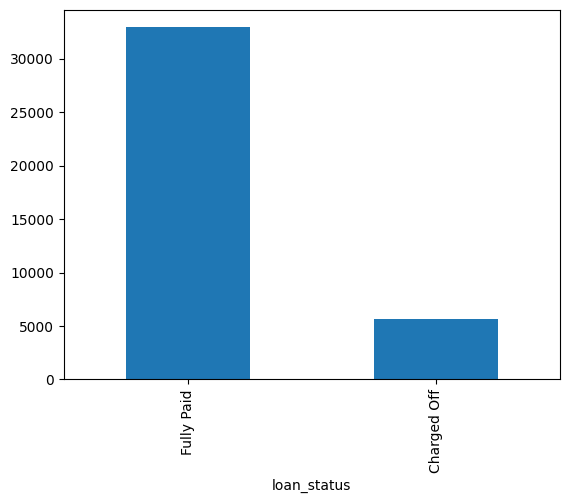

In [162]:
df_loan1['loan_status'].value_counts().plot(kind = 'bar')

Lets check how any other columns are changing their values based on Loan Status column. That way we would be able to check the impact of them to the loan account/status.

#### 1. Owning a Home is pretty big thing. Lets see how Home Ownership affects the Loan Status.

In [168]:
df_loan1.groupby('loan_status')['home_ownership'].value_counts()

loan_status  home_ownership
Charged Off  RENT               2829
             MORTGAGE           2323
             OWN                 441
             OTHER                18
Fully Paid   RENT              15619
             MORTGAGE          14687
             OWN                2529
             OTHER                78
             NONE                  3
Name: count, dtype: int64

<Axes: xlabel='loan_status,home_ownership'>

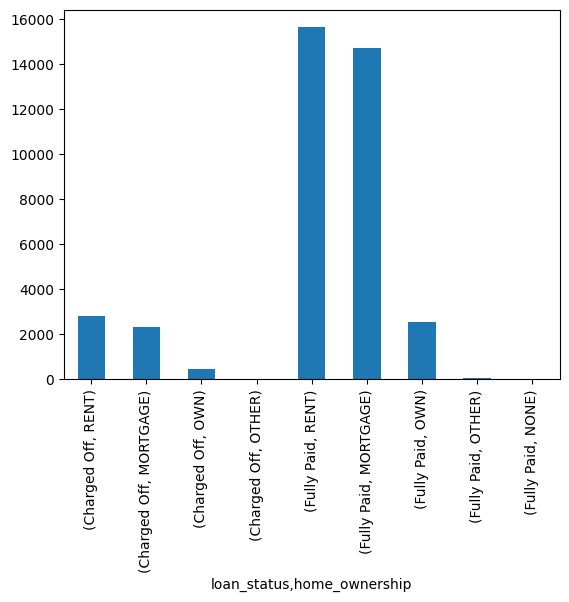

In [172]:
df_loan1.groupby('loan_status')['home_ownership'].value_counts().plot(kind = 'bar')

We see that the Home Ownership is affecting both types of Loan statuses. Hence we can ignore this column.

<Axes: xlabel='loan_status'>

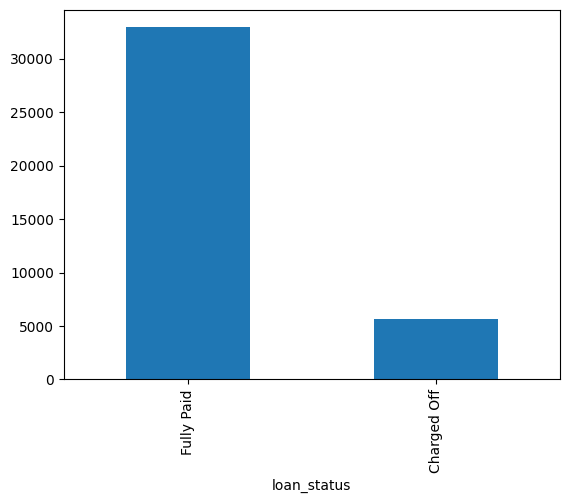

In [174]:
df_loan1.loan_status.value_counts().plot(kind = 'bar')

In [156]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Now we will check how each column is getting affected for all 3 types of Loan Statuses. 

In [198]:
df_loan1['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: count, dtype: int64

Lets replace the None values as they are very less and wont contribute to the analysis. 

In [200]:
df_loan1['home_ownership'].replace('NONE', 'OTHER', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20316\500314566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan1['home_ownership'].replace('NONE', 'OTHER', inplace=True)


In [203]:
df_loan1['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: count, dtype: int64

<Axes: xlabel='home_ownership'>

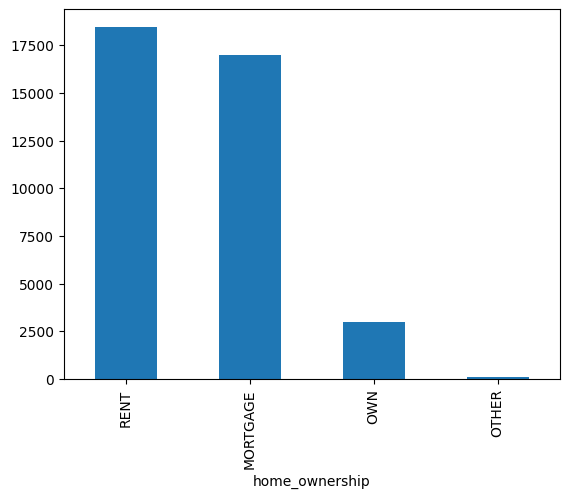

In [206]:
df_loan1['home_ownership'].value_counts().plot(kind = 'bar')

In [204]:
df_loan1.groupby('loan_status')['home_ownership'].value_counts()

loan_status  home_ownership
Charged Off  RENT               2829
             MORTGAGE           2323
             OWN                 441
             OTHER                18
Fully Paid   RENT              15619
             MORTGAGE          14687
             OWN                2529
             OTHER                81
Name: count, dtype: int64

<Axes: xlabel='loan_status,home_ownership'>

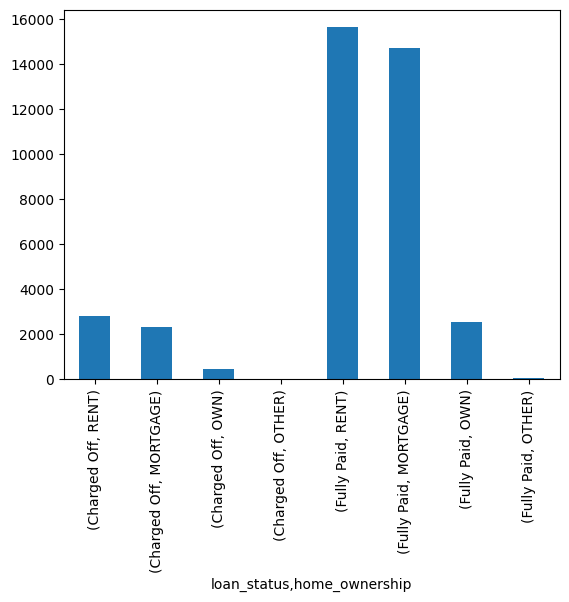

In [205]:
df_loan1.groupby('loan_status')['home_ownership'].value_counts().plot(kind='bar')

<Axes: xlabel='loan_status'>

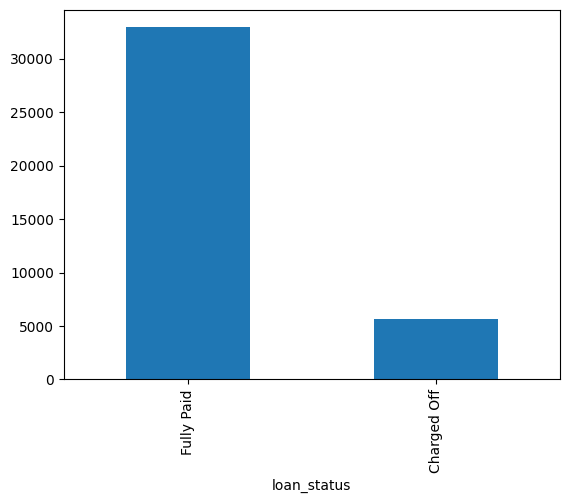

In [230]:
df_loan1['loan_status'].value_counts().plot(kind='bar')

In [240]:
df_loan1['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
16.20      1
Name: count, Length: 370, dtype: int64

In [248]:
pd.pivot_table(df_loan1, values='int_rate',columns=['loan_status'], aggfunc=np.mean)

loan_status,Charged Off,Fully Paid
int_rate,13.813317,11.605893


In [249]:
df_loan1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0,Nov-04,3,0.0,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
